In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
# each list contains [mu1, sigma1, mu2, sigma2]
all_params = [
    [0.0, 1e-6, 0.0, 1.0],
    [-1.0, 0.08, 2.0, 0.15],
    [-2.0, 0.08, 2.0, 0.15],
    [-5.0, 1.0, 5.0, 1.0],
]

param = all_params[3]  # CHANGE ME

In [3]:
name = "1d_gaussian_" + \
        f"mu1_{param[0]}_" + \
        f"sigma1_{param[1]}_" + \
        f"mu2_{param[2]}_" + \
        f"sigma2_{param[3]}"

print(f"Creating figures for: {name}")

Creating figures for: 1d_gaussian_mu1_-5.0_sigma1_1.0_mu2_5.0_sigma2_1.0


In [4]:
loaded = np.load(f"{name}/data.npz")

These are the quantaties saved in the files:

In [5]:
print("keys in 1st file:\n")
for key in loaded.keys():
    print(key)

keys in 1st file:

p_samples
q_samples
u_samples
estimated_logratio_vals_at_p
estimated_logratio_vals_at_q
estimated_logratio_vals_at_u
true_logratio_vals_at_p
true_logratio_vals_at_q
true_logratio_vals_at_u
estimated_kl
true_kl


In [6]:
print("Estimated KL: {}\nTrue KL: {}".format(loaded["estimated_kl"], loaded["true_kl"]))

Estimated KL: 34.50714111328125
True KL: 50.314678824453786


In [7]:
p_batch = loaded["p_samples"]
q_batch = loaded["q_samples"]
u_batch = loaded["u_samples"]

true_logratio_vals_at_p = loaded["true_logratio_vals_at_p"]
true_logratio_vals_at_q = loaded["true_logratio_vals_at_q"]
true_logratio_vals_at_u = loaded["true_logratio_vals_at_u"]

estimated_logratio_vals_at_p = loaded["estimated_logratio_vals_at_p"]
estimated_logratio_vals_at_q = loaded["estimated_logratio_vals_at_q"]
estimated_logratio_vals_at_u = loaded["estimated_logratio_vals_at_u"]

In [8]:
def _plot_1d_logratio(u_batch, true_logratio_vals_at_u,
                      estimated_logratio_vals_at_u, dist="u"):
    """plot estimated & true logr(x)"""
    fig, ax = plt.subplots(1, 1)
    ax.scatter(u_batch, true_logratio_vals_at_u, label="True")
    ax.scatter(u_batch, estimated_logratio_vals_at_u, label="Estimated")
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\log r(x)$")
    fig.suptitle(r"$\log r(x)$ for $x \sim$" + dist)
    fig.legend()

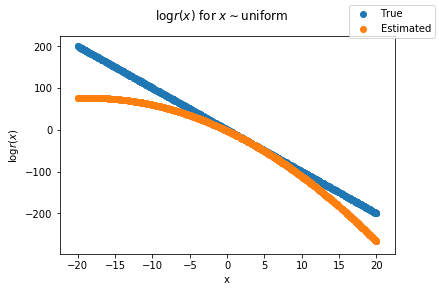

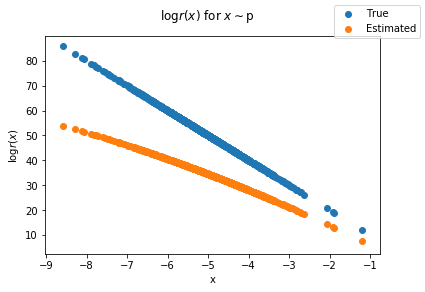

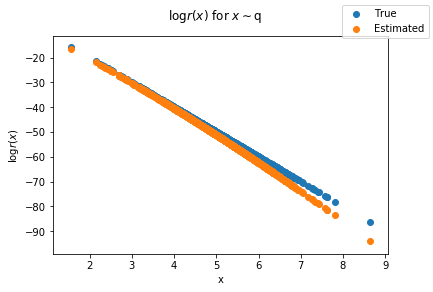

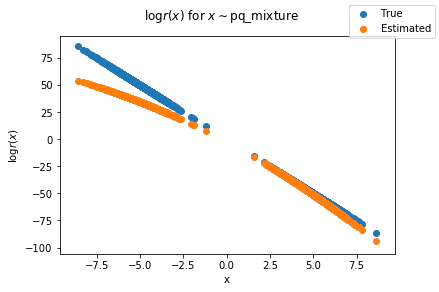

In [9]:
# plot logr(x) where x ~ uniform
_plot_1d_logratio(u_batch, true_logratio_vals_at_u, estimated_logratio_vals_at_u, "uniform")

_plot_1d_logratio(p_batch, true_logratio_vals_at_p, estimated_logratio_vals_at_p, "p")
_plot_1d_logratio(q_batch, true_logratio_vals_at_q, estimated_logratio_vals_at_q, "q")

# plot logr(x) where x ~ 0.5p + 0.5q
_plot_1d_logratio(
    np.concatenate([p_batch, q_batch], axis=0),
    np.concatenate([true_logratio_vals_at_p, true_logratio_vals_at_q], axis=0),
    np.concatenate([estimated_logratio_vals_at_p, estimated_logratio_vals_at_q], axis=0),
    "pq_mixture"
)

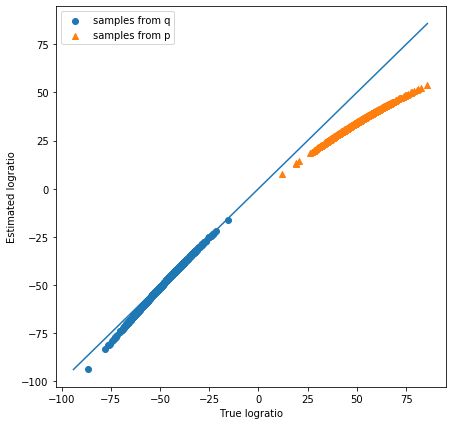

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# ax.scatter(true_logratio_vals_at_u, estimated_logratio_vals_at_u, label="samples from u", alpha=0.1)
ax.scatter(true_logratio_vals_at_q, estimated_logratio_vals_at_q, label="samples from q", alpha=1.0)
ax.scatter(true_logratio_vals_at_p, estimated_logratio_vals_at_p, label="samples from p", alpha=1.0, marker='^')


ax.set_xlabel("True logratio")
ax.set_ylabel("Estimated logratio")

min_v = min(true_logratio_vals_at_q.min(), estimated_logratio_vals_at_q.min(),
            true_logratio_vals_at_p.min(), estimated_logratio_vals_at_p.min())
max_v = max(true_logratio_vals_at_q.max(), estimated_logratio_vals_at_q.max(),
            true_logratio_vals_at_p.max(), estimated_logratio_vals_at_p.max())
line = np.linspace(min_v, max_v, 128)
ax.plot(line, line, linestyle="-")
_ =ax.legend()